<a name="top"></a><img src="./source/SpinalHDL.png" alt="SpinalHDL based on Scala" style="width:320px;" />

  Before running Spinal HDL code, be sure to load SpinalHDL Libraries  
**Note** : This may be a little slow when the first time load, please wait a moment to download Lib from remote.)

In [1]:
val path = System.getProperty("user.dir") + "/source/load-spinal.sc"
interp.load.module(ammonite.ops.Path(java.nio.file.FileSystems.getDefault().getPath(path)))

path: String = "E:\\GitHub\\SpinalHDL\\Spinal-bootcamp/source/load-spinal.sc"

## Assignment
- **:=** Standard assignment, equivalent to ‘<=’ in VHDL/Verilog :<br>the last assignment to a variable wins,<br>the value is not updated until the next simulation delta cycle
- **\\=** Equivalent to := in VHDL and = in Verilog<br>the value is updated instantly
- **<>** Automatic connection between 2 signals or two bundles of the same type.<br>Direction is inferred by using signal direction 

SpinalHDL checks that there are no combinatorial loops (latches) in your design. If one is detected, it raises an error and SpinalHDL will print the path of the loop.

####  Connection

In [2]:
class Top extends Component{
 val a,b,c = UInt(4 bits)
 a := 0
 b := a
 c := a
}
showRtl(new Top)

[Runtime] SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
[Runtime] JVM max memory : 8116.0MiB
[Runtime] Current date : 2022.03.06 19:45:50
[Progress] at 0.000 : Elaborate components


[Thread-0] WARN net.openhft.affinity.Affinity - Windows JNA-based affinity not usable because it failed to load! Reason: java.lang.NoClassDefFoundError: Could not initialize class com.sun.jna.Native
	at net.openhft.affinity.impl.WindowsJNAAffinity$CLibrary.<clinit>(WindowsJNAAffinity.java:140)
	at net.openhft.affinity.impl.WindowsJNAAffinity.getAffinity(WindowsJNAAffinity.java:61)
	at net.openhft.affinity.impl.WindowsJNAAffinity.<clinit>(WindowsJNAAffinity.java:49)
	at net.openhft.affinity.Affinity.isWindowsJNAAffinityUsable(Affinity.java:87)
	at net.openhft.affinity.Affinity.<clinit>(Affinity.java:45)
	at spinal.sim.JvmThread.run(SimManager.scala:46)

[Thread-0] INFO net.openhft.affinity.Affinity - Using dummy affinity control implementation


[Progress] at 0.136 : Checks and transforms
[Progress] at 0.167 : Generate Verilog
[Warning] 3 signals were pruned. You can call printPruned on the backend report to get more informations.
[Done] at 0.202
// Generator : SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
// Component : Top

`timescale 1ns/1ps 

module Top (
);

  wire       [3:0]    a;
  wire       [3:0]    b;
  wire       [3:0]    c;

  assign a = 4'b0000;
  assign b = a;
  assign c = a;

endmodule



defined class Top

In [3]:
class Top extends Component{
  var x = UInt(4 bits)
  val y,z = UInt(4 bits)
  x := 0
  y := x      //y read x with the value 0
  x \= x + 1
  z := x      //z read x with the value 1
}
showRtl(new Top)

[Runtime] SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
[Runtime] JVM max memory : 8116.0MiB
[Runtime] Current date : 2022.03.06 19:46:19
[Progress] at 29.192 : Elaborate components
[Progress] at 29.201 : Checks and transforms
[Progress] at 29.209 : Generate Verilog
[Warning] 4 signals were pruned. You can call printPruned on the backend report to get more informations.
[Done] at 29.229
// Generator : SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
// Component : Top

`timescale 1ns/1ps 

module Top (
);

  reg        [3:0]    x_1;
  wire       [3:0]    x;
  wire       [3:0]    y;
  wire       [3:0]    z;

  always @(*) begin
    x_1 = x;
    x_1 = (x + 4'b0001);
  end

  assign x = 4'b0000;
  assign y = x;
  assign z = x_1;

endmodule



defined class Top

#### declare data type

In [4]:
class Top extends Component{
val a = UInt(4 bits) //Define a combinatorial signal
val b = Reg(UInt(4 bits)) //Define a registered signal
val c = Reg(UInt(4 bits)) init(0) //Define a registered signal which is set to 0 when a reset occurs
}
showRtl(new Top)

[Runtime] SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
[Runtime] JVM max memory : 8116.0MiB
[Runtime] Current date : 2022.03.06 19:56:59
[Progress] at 668.574 : Elaborate components
[Progress] at 668.588 : Checks and transforms
[Progress] at 668.613 : Generate Verilog
[Warning] 3 signals were pruned. You can call printPruned on the backend report to get more informations.
[Done] at 668.620
// Generator : SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
// Component : Top

`timescale 1ns/1ps 

module Top (
  input               clk,
  input               reset
);

  wire       [3:0]    a;
  reg        [3:0]    b;
  wire       [3:0]    c;

  assign c = 4'b0000;

endmodule



defined class Top

#### width match check

In [5]:
class Top extends Component{
    val x = in UInt(10 bits)
    val y = out UInt(8 bits)
    val z,z1 = out UInt()
    y := x.resized
    z := x.resize(4)
    z1 := x.resize(12)
    
    val a = in SInt(8 bits)
    val b = out SInt(16 bits)
    b := a.resized
}
showRtl(new Top)

[Runtime] SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
[Runtime] JVM max memory : 8116.0MiB
[Runtime] Current date : 2022.03.06 19:59:06
[Progress] at 795.682 : Elaborate components
[Progress] at 795.691 : Checks and transforms
[Progress] at 795.693 : Generate Verilog
[Done] at 795.699
// Generator : SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
// Component : Top

`timescale 1ns/1ps 

module Top (
  input      [9:0]    x,
  output     [7:0]    y,
  output     [3:0]    z,
  output     [11:0]   z1,
  input      [7:0]    a,
  output     [15:0]   b
);


  assign y = x[7:0];
  assign z = x[3:0];
  assign z1 = {2'd0, x};
  assign b = {{8{a[7]}}, a};

endmodule



defined class Top

#### constant assigment

In [6]:
class Top extends Component{
    val y,z = out UInt(8 bits)
    val a,b = out SInt(8 bits)
    y := U(3)
    z := 3  
    a := S(-3)
    b := -3
}
showRtl(new Top)

[Runtime] SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
[Runtime] JVM max memory : 8116.0MiB
[Runtime] Current date : 2022.03.06 19:59:25
[Progress] at 815.020 : Elaborate components
[Progress] at 815.025 : Checks and transforms
[Progress] at 815.028 : Generate Verilog
[Done] at 815.045
// Generator : SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
// Component : Top

`timescale 1ns/1ps 

module Top (
  output     [7:0]    y,
  output     [7:0]    z,
  output     [7:0]    a,
  output     [7:0]    b
);


  assign y = 8'h03;
  assign z = 8'h03;
  assign a = 8'hfd;
  assign b = 8'hfd;

endmodule



defined class Top

## Branch(When/Switch/Mux)

#### conditional branch

In [7]:
//When 
class Top extends Component{
    val cond1,cond2= in Bool()
    val dout = out UInt(8 bits)
  when(cond1){
      dout := 11
  //execute when      cond1 is true
  }.elsewhen(cond2){
      dout := 23
  //execute when (not cond1) and cond2
  }.otherwise{
      dout := 51
  //execute when (not cond1) and (not cond2)
  }
}
showRtl(new Top)

[Runtime] SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
[Runtime] JVM max memory : 8116.0MiB
[Runtime] Current date : 2022.03.06 20:03:15
[Progress] at 1044.902 : Elaborate components
[Progress] at 1044.910 : Checks and transforms
[Progress] at 1044.917 : Generate Verilog
[Done] at 1044.920
// Generator : SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
// Component : Top

`timescale 1ns/1ps 

module Top (
  input               cond1,
  input               cond2,
  output reg [7:0]    dout
);


  always @(*) begin
    if(cond1) begin
      dout = 8'h0b;
    end else begin
      if(cond2) begin
        dout = 8'h17;
      end else begin
        dout = 8'h33;
      end
    end
  end


endmodule



defined class Top

#### case branch 
A complete case statement generate by the spinalddl switch  
The switch generated in chisel is replaced by if else. Although there is no problem in function, but it is not very good-looking.

In [8]:
//Switch 
class Top extends Component{
 val x = in UInt(2 bits)
 val dout = out UInt(8 bits)
 switch(x){
  is(0){
    //execute when x === value1
    dout := 11
  }
  is(1){
    //execute when x === value2
    dout := 23
  }
  default{
    //execute if none of precedent condition meet
    dout := 51
  }
 }
}
showRtl(new Top)

[Runtime] SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
[Runtime] JVM max memory : 8116.0MiB
[Runtime] Current date : 2022.03.06 20:17:44
[Progress] at 1914.285 : Elaborate components
[Progress] at 1914.295 : Checks and transforms
[Progress] at 1914.305 : Generate Verilog
[Done] at 1914.311
// Generator : SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
// Component : Top

`timescale 1ns/1ps 

module Top (
  input      [1:0]    x,
  output reg [7:0]    dout
);


  always @(*) begin
    case(x)
      2'b00 : begin
        dout = 8'h0b;
      end
      2'b01 : begin
        dout = 8'h17;
      end
      default : begin
        dout = 8'h33;
      end
    endcase
  end


endmodule



defined class Top

#### Mux, cond Expression

In [9]:
//Mux cond? 
class Top extends Component{
val cond = in Bool()
val muxOutput,muxOutput2 = out UInt(8 bits)
 muxOutput  := Mux(cond, U(33,8 bits), U(51, 8 bits))
 muxOutput2 := cond ? U(22,8 bits) | U(49, 8 bits)
}
showRtl(new Top)

[Runtime] SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
[Runtime] JVM max memory : 8116.0MiB
[Runtime] Current date : 2022.03.06 20:27:39
[Progress] at 2509.042 : Elaborate components
[Progress] at 2509.059 : Checks and transforms
[Progress] at 2509.062 : Generate Verilog
[Done] at 2509.065
// Generator : SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
// Component : Top

`timescale 1ns/1ps 

module Top (
  input               cond,
  output     [7:0]    muxOutput,
  output     [7:0]    muxOutput2
);


  assign muxOutput = (cond ? 8'h21 : 8'h33);
  assign muxOutput2 = (cond ? 8'h16 : 8'h31);

endmodule



defined class Top

#### sel.mux Expression

In [12]:
//mux
class Top extends Component{
    val io = new Bundle{
        val src0,src1 = in Bool()
    }
  val bitwiseSelect = UInt(2 bits)
  val bitwiseResult = bitwiseSelect.mux(
   0 -> (io.src0 & io.src1),
   1 -> (io.src0 | io.src1),
   2 -> (io.src0 ^ io.src1),
   default -> (io.src0)
  )
}
showRtl(new Top)

[Runtime] SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
[Runtime] JVM max memory : 8116.0MiB
[Runtime] Current date : 2022.03.06 20:31:31
[Progress] at 2741.426 : Elaborate components
[Progress] at 2741.435 : Checks and transforms
[Progress] at 2741.439 : Generate Verilog
[Warning] 2 signals were pruned. You can call printPruned on the backend report to get more informations.
[Done] at 2741.443
// Generator : SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
// Component : Top

`timescale 1ns/1ps 

module Top (
  input               io_src0,
  input               io_src1
);

  wire       [1:0]    bitwiseSelect;
  reg                 bitwiseResult;

  always @(*) begin
    case(bitwiseSelect)
      2'b00 : begin
        bitwiseResult = (io_src0 && io_src1);
      end
      2'b01 : begin
        bitwiseResult = (io_src0 || io_src1);
      end
      2'b10 : begin
        bitwiseResult = (io_src0 ^ io_src1);
      end
      default : begin
  

defined class Top

#### sel.mux expression， subdivideIn function
`muxLists(...)` is another bitwise selection which take as input a sequence of tuples.   
Below an example of dividing a Bits of 128 bits into 32 bits:
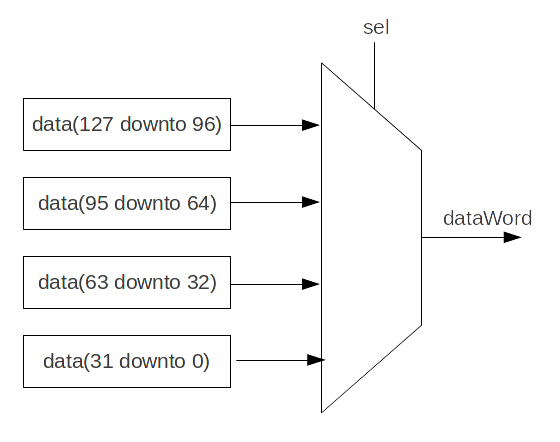

In [13]:
//mux
class Top extends Component{
  val sel  = in UInt(2 bits)
  val data = in Bits(128 bits)
  val dataWord = sel.muxList(for(index <- 0 until 4) yield (index, data(index*32+32-1 downto index*32)))
  // This example can be written shorter.
  val dataWord2 = data.subdivideIn(32 bits)(sel)
}
showRtl(new Top)

[Runtime] SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
[Runtime] JVM max memory : 8116.0MiB
[Runtime] Current date : 2022.03.06 20:31:50
[Progress] at 2760.416 : Elaborate components
[Progress] at 2760.448 : Checks and transforms
[Progress] at 2760.454 : Generate Verilog
[Warning] 2 signals were pruned. You can call printPruned on the backend report to get more informations.
[Done] at 2760.463
// Generator : SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
// Component : Top

`timescale 1ns/1ps 

module Top (
  input      [1:0]    sel,
  input      [127:0]  data
);

  reg        [31:0]   _zz_dataWord2;
  reg        [31:0]   dataWord;
  wire       [31:0]   dataWord2;

  always @(*) begin
    case(sel)
      2'b00 : _zz_dataWord2 = data[31 : 0];
      2'b01 : _zz_dataWord2 = data[63 : 32];
      2'b10 : _zz_dataWord2 = data[95 : 64];
      default : _zz_dataWord2 = data[127 : 96];
    endcase
  end

  always @(*) begin
    case(sel)
     

defined class Top

## Rules

In [11]:
class Top extends Component{
val a, b, c = UInt(8 bits) // Define 3 combinatorial signals
  c := a + b   // c will be set to 7
  b := 2       // b will be set to 2
  a := b + 3   // a will be set to 5
}
showRtl(new Top)

[Runtime] SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
[Runtime] JVM max memory : 8116.0MiB
[Runtime] Current date : 2022.03.06 20:30:34
[Progress] at 2684.216 : Elaborate components
[Progress] at 2684.218 : Checks and transforms
[Progress] at 2684.220 : Generate Verilog
[Warning] 3 signals were pruned. You can call printPruned on the backend report to get more informations.
[Done] at 2684.223
// Generator : SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
// Component : Top

`timescale 1ns/1ps 

module Top (
);

  wire       [7:0]    a;
  wire       [7:0]    b;
  wire       [7:0]    c;

  assign c = (a + b);
  assign b = 8'h02;
  assign a = (b + 8'h03);

endmodule



defined class Top

In [10]:
class Top extends Component{
val x, y = Bool             //Define two combinatorial signals
val result = UInt(8 bits)   //Define a combinatorial signal

result := 1
when(x){
  result := 2
  when(y){
    result := 3
  }
}
}
showRtl(new Top)

[Runtime] SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
[Runtime] JVM max memory : 8116.0MiB
[Runtime] Current date : 2022.03.06 20:30:06
[Progress] at 2656.145 : Elaborate components
[Progress] at 2656.147 : Checks and transforms
[Progress] at 2656.150 : Generate Verilog
[Warning] 3 signals were pruned. You can call printPruned on the backend report to get more informations.
[Done] at 2656.153
// Generator : SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
// Component : Top

`timescale 1ns/1ps 

module Top (
);

  wire                x;
  wire                y;
  reg        [7:0]    result;

  always @(*) begin
    result = 8'h01;
    if(x) begin
      result = 8'h02;
      if(y) begin
        result = 8'h03;
      end
    end
  end


endmodule



defined class Top

In [14]:
class Top extends Component{
val inc, clear = Bool            //Define two combinatorial signal/wire
val counter = Reg(UInt(8 bits))  //Define a 8 bits register

when(inc){
  counter := counter + 1
}
when(clear){
  counter := 0    //If inc and clear are True, then this  assignement wins (Last valid assignement rule)
}
}
showRtl(new Top)

[Runtime] SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
[Runtime] JVM max memory : 8116.0MiB
[Runtime] Current date : 2022.03.06 20:32:11
[Progress] at 2781.283 : Elaborate components
[Progress] at 2781.288 : Checks and transforms
[Progress] at 2781.293 : Generate Verilog
[Warning] 3 signals were pruned. You can call printPruned on the backend report to get more informations.
[Done] at 2781.299
// Generator : SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
// Component : Top

`timescale 1ns/1ps 

module Top (
  input               clk,
  input               reset
);

  wire                inc;
  wire                clear;
  reg        [7:0]    counter;

  always @(posedge clk) begin
    if(inc) begin
      counter <= (counter + 8'h01);
    end
    if(clear) begin
      counter <= 8'h0;
    end
  end


endmodule



defined class Top

Package operations as methods improve abstract ability

In [15]:
class Top extends Component{
    val inc, clear = Bool
val counter = Reg(UInt(8 bits))

def setCounter(value : UInt): Unit = {
  counter := value
}

when(inc){
  setCounter(counter + 1)  // Set counter with counter + 1
}
when(clear){
  counter := 0
}
}
showRtl(new Top)

[Runtime] SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
[Runtime] JVM max memory : 8116.0MiB
[Runtime] Current date : 2022.03.06 22:56:14
[Progress] at 11423.610 : Elaborate components
[Progress] at 11423.616 : Checks and transforms
[Progress] at 11423.617 : Generate Verilog
[Warning] 3 signals were pruned. You can call printPruned on the backend report to get more informations.
[Done] at 11423.620
// Generator : SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
// Component : Top

`timescale 1ns/1ps 

module Top (
  input               clk,
  input               reset
);

  wire                inc;
  wire                clear;
  reg        [7:0]    counter;

  always @(posedge clk) begin
    if(inc) begin
      counter <= (counter + 8'h01);
    end
    if(clear) begin
      counter <= 8'h0;
    end
  end


endmodule



defined class Top

Internal methods can operate on all variables under Component

In [16]:
class Top extends Component{
val inc, clear = Bool
val counter = Reg(UInt(8 bits))

def setCounterWhen(cond : Bool,value : UInt): Unit = {
  when(cond) {
    counter := value
  }
}

setCounterWhen(cond = inc,   value = counter + 1)
setCounterWhen(cond = clear, value = 0)
}
showRtl(new Top)

[Runtime] SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
[Runtime] JVM max memory : 8116.0MiB
[Runtime] Current date : 2022.03.06 22:56:35
[Progress] at 11444.627 : Elaborate components
[Progress] at 11444.631 : Checks and transforms
[Progress] at 11444.633 : Generate Verilog
[Warning] 3 signals were pruned. You can call printPruned on the backend report to get more informations.
[Done] at 11444.635
// Generator : SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
// Component : Top

`timescale 1ns/1ps 

module Top (
  input               clk,
  input               reset
);

  wire                inc;
  wire                clear;
  reg        [7:0]    counter;

  always @(posedge clk) begin
    if(inc) begin
      counter <= (counter + 8'h01);
    end
    if(clear) begin
      counter <= 8'h0;
    end
  end


endmodule



defined class Top

Of course, it can also be package as an independent function, which is passed in as a parameter by the operation object

In [17]:
class Top extends Component{
val inc, clear = Bool
val counter = Reg(UInt(8 bits))

def setSomethingWhen(something : UInt,cond : Bool,value : UInt): Unit = {
  when(cond) {
    something := value
  }
}

setSomethingWhen(something = counter, cond = inc,   value = counter + 1)
setSomethingWhen(something = counter, cond = clear, value = 0)
}
showRtl(new Top)

[Runtime] SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
[Runtime] JVM max memory : 8116.0MiB
[Runtime] Current date : 2022.03.06 22:57:13
[Progress] at 11483.028 : Elaborate components
[Progress] at 11483.037 : Checks and transforms
[Progress] at 11483.039 : Generate Verilog
[Warning] 3 signals were pruned. You can call printPruned on the backend report to get more informations.
[Done] at 11483.043
// Generator : SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
// Component : Top

`timescale 1ns/1ps 

module Top (
  input               clk,
  input               reset
);

  wire                inc;
  wire                clear;
  reg        [7:0]    counter;

  always @(posedge clk) begin
    if(inc) begin
      counter <= (counter + 8'h01);
    end
    if(clear) begin
      counter <= 8'h0;
    end
  end


endmodule



defined class Top